In [246]:
# Data Manipulation
import numpy as np 
import pandas as pd


# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


# Statistics
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.special import inv_boxcox
from scipy.stats import boxcox
from scipy.interpolate import interp1d

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from dateutil.parser import parse 
import pickle
import warnings
warnings.filterwarnings("ignore")
# Set the options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline
plt.rcParams.update({'figure.figsize': (12, 8), 'figure.dpi': 120})

In [275]:
df = pd.read_csv('timeSeries.csv', parse_dates= ['date'])

In [276]:
df.dropna(axis=1, thresh= len(df)*0.8, inplace= True)
print(len(df))
df.isna().sum()

2379893


Unnamed: 0                   0
testPositivityRatio     368114
caseDensity_x            45455
infectionRate           163354
infectionRateCI90       163354
date                         0
fips                         0
country                      0
state                        0
county                       0
level                        0
locationId                   0
population                   0
cases                    63072
deaths                  114534
newCases                 84886
newDeaths               124434
overall                      0
caseDensity_y                0
cdcTransmissionLevel         0
dtype: int64

In [277]:
df.describe()

,Unnamed: 0,testPositivityRatio,caseDensity_x,infectionRate,infectionRateCI90,fips,population,cases,deaths,newCases,newDeaths,overall,caseDensity_y,cdcTransmissionLevel
count,2.379893e+06,2.011779e+06,2.334438e+06,2.216539e+06,2.216539e+06,2.379893e+06,2.379893e+06,2.316821e+06,2.265359e+06,2.295007e+06,2.255459e+06,2.379893e+06,2.379893e+06,2.379893e+06
mean,1.189946e+06,1.056430e-01,3.275598e+01,9.776145e-01,6.116622e-01,3.133946e+04,1.053266e+05,8.955421e+03,1.509172e+02,3.399200e+01,4.180679e-01,2.227898e+00,2.128031e+00,2.213958e+00
std,6.870161e+05,1.003695e-01,4.853400e+01,1.868633e-01,3.234381e-01,1.632536e+04,3.386173e+05,3.918175e+04,6.386501e+02,3.054889e+02,2.768505e+00,1.371623e+00,1.404614e+00,1.063643e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e-02,1.000000e-01,1.001000e+03,8.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.949730e+05,3.500000e-02,5.000000e+00,8.500000e-01,3.200000e-01,1.901900e+04,1.124900e+04,3.360000e+02,5.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.189946e+06,7.800000e-02,1.610000e+01,9.900000e-01,6.100000e-01,3.001700e+04,2.629600e+04,1.593000e+03,3.000000e+01,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
75%,1.784919e+06,1.460000e-01,4.220000e+01,1.090000e+00,8.900000e-01,4.610200e+04,6.812200e+04,5.278000e+03,9.300000e+01,1.400000e+01,0.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
max,2.379892e+06,1.000000e+00,6.954900e+03,2.730000e+00,2.160000e+00,7.215300e+04,1.003911e+07,2.827632e+06,3.153500e+04,1.104410e+05,6.740000e+02,5.000000e+00,5.000000e+00,4.000000e+00


In [278]:
df.describe(include='O')

,country,state,county,level,locationId
count,2379893,2379893,2379893,2379893,2379893
unique,1,53,1958,1,3223
top,US,TX,Washington County,county,iso1:us#iso2:us-ca#fips:06015
freq,2379893,185761,22229,2379893,809


In [279]:
df['newDeathRatio'] = df['newDeaths']/df['population']
df['newCasesRatio'] = df['newCases']/df['population']
df['deathsRatio'] = df['deaths']/df['population']
df['casesRatio'] = df['cases']/df['population']

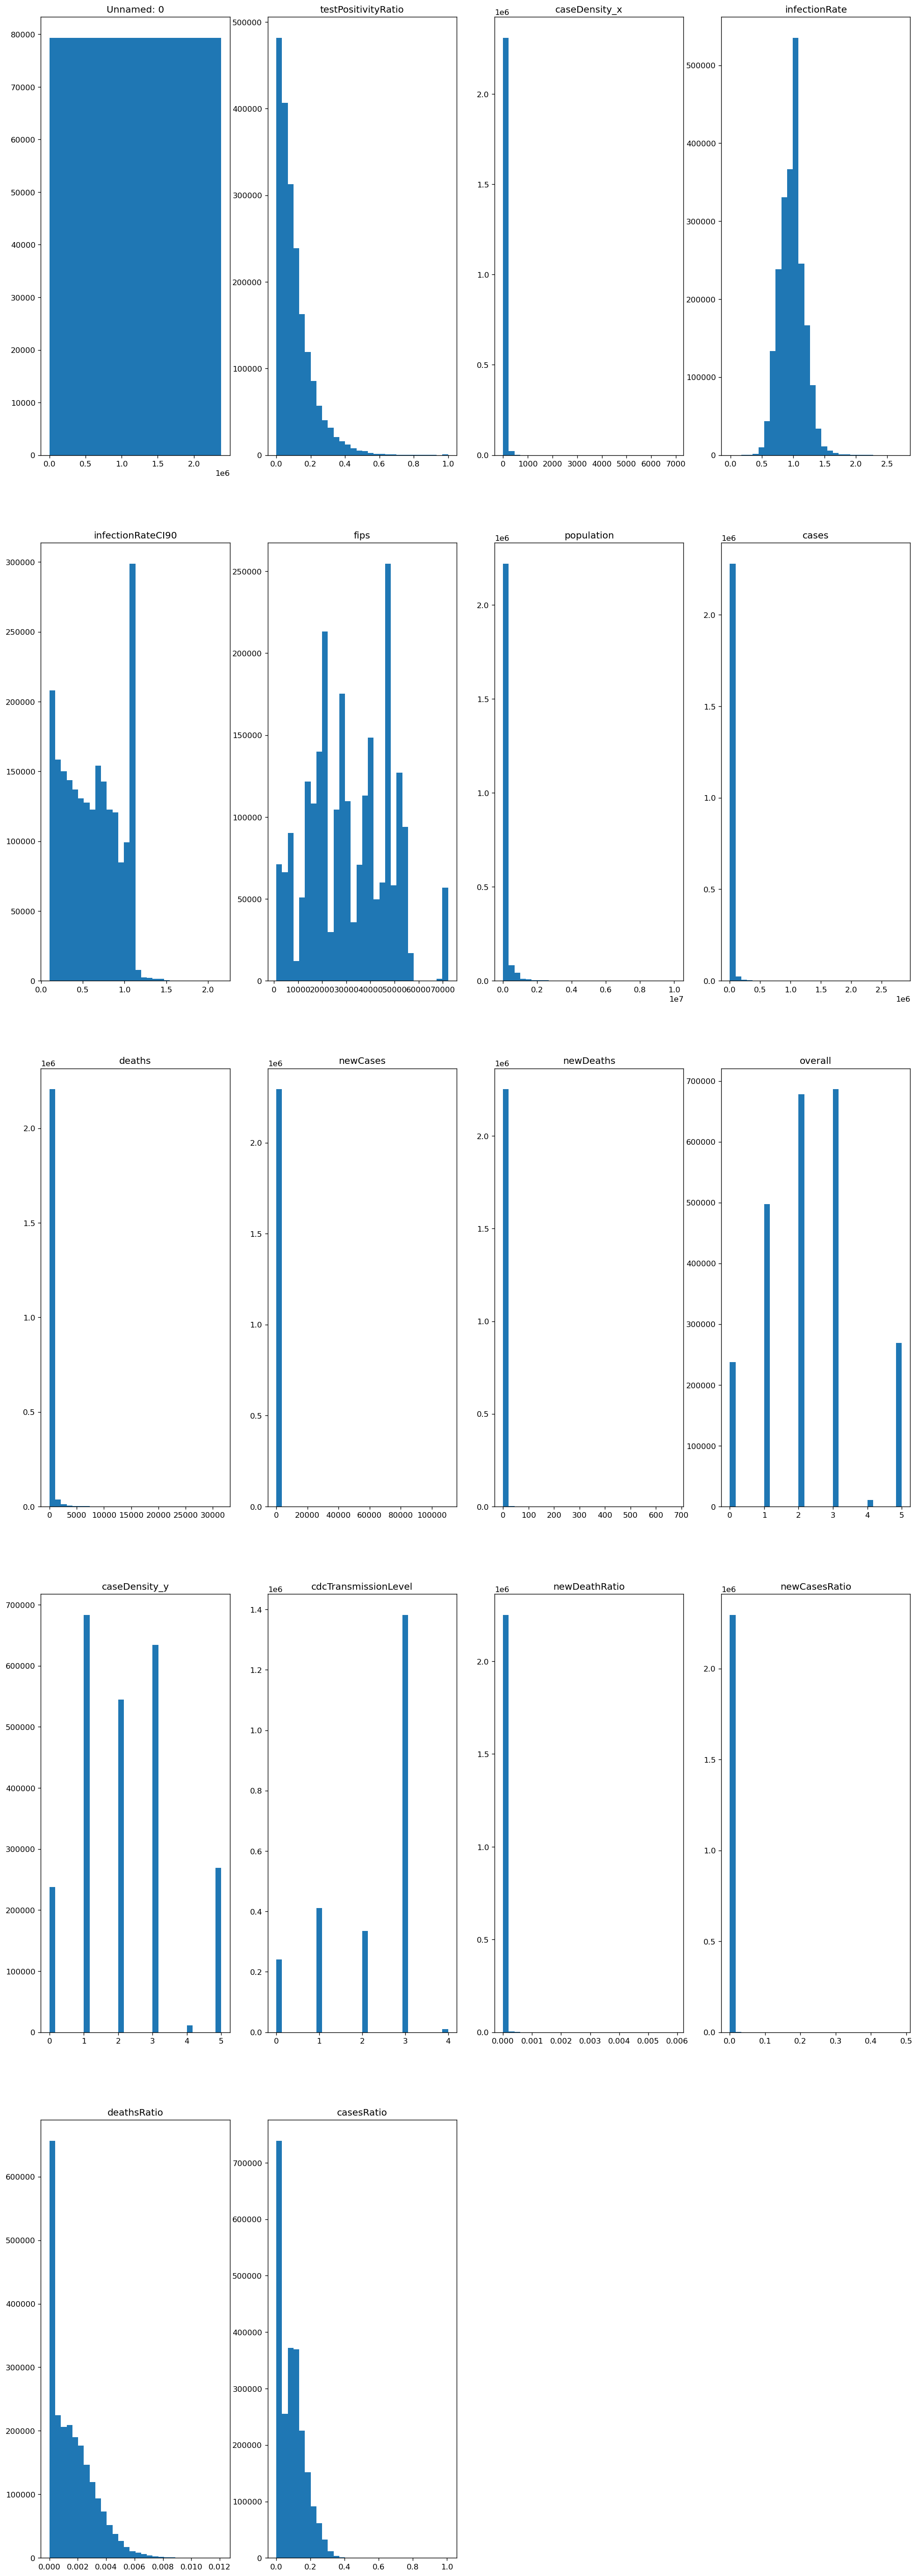

In [280]:
plt.figure(figsize= (20, 60))

for a, col in enumerate([col for col in df if df[col].dtype == 'int64' or df[col].dtype == 'float64']):
    plt.subplot(5,4, a+1)
    plt.hist(df[col], bins=30)
    plt.title(col[:45])

In [281]:
df.columns

Index(['Unnamed: 0', 'testPositivityRatio', 'caseDensity_x', 'infectionRate',
       'infectionRateCI90', 'date', 'fips', 'country', 'state', 'county',
       'level', 'locationId', 'population', 'cases', 'deaths', 'newCases',
       'newDeaths', 'overall', 'caseDensity_y', 'cdcTransmissionLevel',
       'newDeathRatio', 'newCasesRatio', 'deathsRatio', 'casesRatio'],
      dtype='object')

In [282]:
merged1 = df[['date', 'state', 'county', 'population','newDeaths', 'newCases', 'newCasesRatio', 'newDeathRatio']]
mandate_df = pd.read_csv('regulations1.csv', parse_dates= ['date'])
mandate_df.columns

Index(['Unnamed: 0', 'State_Tribe_Territory', 'County_Name', 'FIPS_State',
       'FIPS_County', 'date', 'Order_code',
       'Stay_at_Home_Order_Recommendation', 'Action', 'restaurant_order',
       'General_GB_order_group', 'General_GB_order_code', 'mask_order'],
      dtype='object')

In [283]:
merged = merged1.merge(mandate_df, left_on= [ 'state', 'county','date'], right_on=['State_Tribe_Territory', 'County_Name', 'date'], how= 'outer')


In [285]:
merged.drop(['Unnamed: 0', 'State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County'], axis= 1, inplace=True)

In [286]:
merged.head()

,date,state,county,population,newDeaths,newCases,newCasesRatio,newDeathRatio,Order_code,Stay_at_Home_Order_Recommendation,Action,restaurant_order,General_GB_order_group,General_GB_order_code,mask_order
0,2020-04-09,AK,Aleutians East Borough,3337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-10,AK,Aleutians East Borough,3337.0,NaN,NaN,NaN,NaN,1.0,Mandatory for all individuals,Curbside/carryout/delivery only,3.0,Bans gatherings of any size,6.0,0.0
2,2020-04-11,AK,Aleutians East Borough,3337.0,NaN,NaN,NaN,NaN,1.0,Mandatory for all individuals,Curbside/carryout/delivery only,3.0,Bans gatherings of any size,6.0,0.0
3,2020-04-12,AK,Aleutians East Borough,3337.0,NaN,NaN,NaN,NaN,1.0,Mandatory for all individuals,Curbside/carryout/delivery only,3.0,Bans gatherings of any size,6.0,0.0
4,2020-04-13,AK,Aleutians East Borough,3337.0,NaN,NaN,NaN,NaN,1.0,Mandatory for all individuals,Curbside/carryout/delivery only,3.0,Bans gatherings of any size,6.0,0.0


In [287]:
merged.shape

(2387970, 15)

In [289]:
merged.to_csv('merged1.csv')

KeyboardInterrupt: 

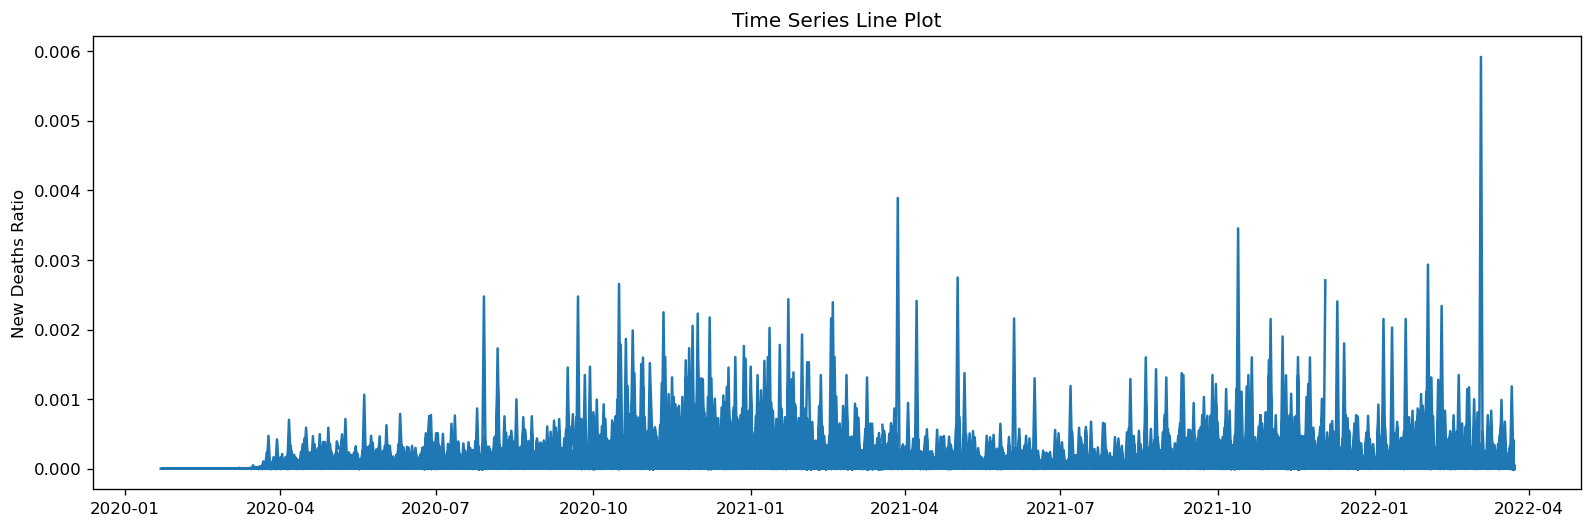

In [15]:
plt.figure(figsize=(16,5))
plt.plot(merged1['date'], merged1['newDeathRatio'])
plt.title('Time Series Line Plot')
plt.ylabel('New Deaths Ratio');

In [290]:
merged1 =  pd.get_dummies(merged, columns=  ['Stay_at_Home_Order_Recommendation', 'Action', 'restaurant_order',
       'General_GB_order_group'],drop_first = True, )

In [17]:
merged1.isna().sum(), len(merged1)

(date                                                                                                                  0
 state                                                                                                              8077
 county                                                                                                             8077
 population                                                                                                         8077
 newDeaths                                                                                                        132511
 newCases                                                                                                          92963
 newCasesRatio                                                                                                     92963
 newDeathRatio                                                                                                    132511
 Order_code                     

In [18]:
merged1.columns

Index(['date', 'state', 'county', 'population', 'newDeaths', 'newCases',
       'newCasesRatio', 'newDeathRatio', 'Order_code', 'General_GB_order_code',
       'mask_order',
       'Stay_at_Home_Order_Recommendation_Mandatory for all individuals',
       'Stay_at_Home_Order_Recommendation_Mandatory only for all individuals in certain areas of the jurisdiction',
       'Stay_at_Home_Order_Recommendation_Mandatory only for at-risk individuals in certain areas of the jurisdiction',
       'Stay_at_Home_Order_Recommendation_Mandatory only for at-risk individuals in the jurisdiction',
       'Stay_at_Home_Order_Recommendation_No order for individuals to stay home',
       'Action_Curbside/carryout/delivery only', 'Action_No order found',
       'Action_Open with social distancing/reduced seating/enhanced sanitation',
       'restaurant_order_0.0', 'restaurant_order_1.0', 'restaurant_order_2.0',
       'restaurant_order_3.0',
       'General_GB_order_group_Ban of gatherings over 101 or more 

In [19]:
merged1.head()

,date,state,county,population,newDeaths,newCases,newCasesRatio,newDeathRatio,Order_code,General_GB_order_code,mask_order,Stay_at_Home_Order_Recommendation_Mandatory for all individuals,Stay_at_Home_Order_Recommendation_Mandatory only for all individuals in certain areas of the jurisdiction,Stay_at_Home_Order_Recommendation_Mandatory only for at-risk individuals in certain areas of the jurisdiction,Stay_at_Home_Order_Recommendation_Mandatory only for at-risk individuals in the jurisdiction,Stay_at_Home_Order_Recommendation_No order for individuals to stay home,Action_Curbside/carryout/delivery only,Action_No order found,Action_Open with social distancing/reduced seating/enhanced sanitation,restaurant_order_0.0,restaurant_order_1.0,restaurant_order_2.0,restaurant_order_3.0,General_GB_order_group_Ban of gatherings over 101 or more people,General_GB_order_group_Ban of gatherings over 11-25 people,General_GB_order_group_Ban of gatherings over 26-50 people,General_GB_order_group_Ban of gatherings over 51-100 people,General_GB_order_group_Bans gatherings of any size,General_GB_order_group_No order found
0,2020-04-09,AK,Aleutians East Borough,3337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-04-10,AK,Aleutians East Borough,3337.0,NaN,NaN,NaN,NaN,1.0,6.0,0.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2,2020-04-11,AK,Aleutians East Borough,3337.0,NaN,NaN,NaN,NaN,1.0,6.0,0.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,2020-04-12,AK,Aleutians East Borough,3337.0,NaN,NaN,NaN,NaN,1.0,6.0,0.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
4,2020-04-13,AK,Aleutians East Borough,3337.0,NaN,NaN,NaN,NaN,1.0,6.0,0.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [20]:
merged1.shape

(2387970, 29)

In [21]:
merged1['date'].dtype

dtype('<M8[ns]')

In [51]:
import random
test_counties = random.sample(list(merged1['county'].unique()), 10)
county_testdf = merged1[merged1['county'].isin(test_counties)]
merged1 = merged1[~merged1['county'].isin(test_counties)]
county_testdf.head()

,date,state,county,population,newDeaths,newCases,newCasesRatio,newDeathRatio,Order_code,General_GB_order_code,mask_order,Stay_at_Home_Order_Recommendation_Mandatory for all individuals,Stay_at_Home_Order_Recommendation_Mandatory only for all individuals in certain areas of the jurisdiction,Stay_at_Home_Order_Recommendation_Mandatory only for at-risk individuals in certain areas of the jurisdiction,Stay_at_Home_Order_Recommendation_Mandatory only for at-risk individuals in the jurisdiction,Stay_at_Home_Order_Recommendation_No order for individuals to stay home,Action_Curbside/carryout/delivery only,Action_No order found,Action_Open with social distancing/reduced seating/enhanced sanitation,restaurant_order_0.0,restaurant_order_1.0,restaurant_order_2.0,restaurant_order_3.0,General_GB_order_group_Ban of gatherings over 101 or more people,General_GB_order_group_Ban of gatherings over 11-25 people,General_GB_order_group_Ban of gatherings over 26-50 people,General_GB_order_group_Ban of gatherings over 51-100 people,General_GB_order_group_Bans gatherings of any size,General_GB_order_group_No order found
45129,2020-03-16,AL,Hale County,14651.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45130,2020-03-17,AL,Hale County,14651.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45131,2020-03-18,AL,Hale County,14651.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45132,2020-03-19,AL,Hale County,14651.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45133,2020-03-20,AL,Hale County,14651.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [215]:
county = random.sample(list(merged1['county'].unique()), 1)
county = merged1[merged1['county'].isin(county)]

In [216]:
trainc = county[county['date'] <= '11/01/2021']
trainc = county[county['date'].isna() == False]
trainc = trainc.set_index('date')
testc = county[county['date'] > '11/01/2021']
testc = testc.set_index('date')

In [217]:
trainc.isna().sum()

state                                                                                                              0
county                                                                                                             0
population                                                                                                         0
newDeaths                                                                                                          8
newCases                                                                                                          17
newCasesRatio                                                                                                     17
newDeathRatio                                                                                                      8
Order_code                                                                                                       247
General_GB_order_code                                           

In [218]:
columns= [ 'Stay_at_Home_Order_Recommendation_Mandatory for all individuals',
       'Stay_at_Home_Order_Recommendation_Mandatory only for all individuals in certain areas of the jurisdiction',
       'Stay_at_Home_Order_Recommendation_Mandatory only for at-risk individuals in certain areas of the jurisdiction',
       'Stay_at_Home_Order_Recommendation_Mandatory only for at-risk individuals in the jurisdiction',
       'Stay_at_Home_Order_Recommendation_No order for individuals to stay home',
       'Action_Curbside/carryout/delivery only', 'Action_No order found',
       'Action_Open with social distancing/reduced seating/enhanced sanitation',
       'General_GB_order_group_Ban of gatherings over 101 or more people',
       'General_GB_order_group_Ban of gatherings over 11-25 people',
       'General_GB_order_group_Ban of gatherings over 26-50 people',
       'General_GB_order_group_Ban of gatherings over 51-100 people',
       'General_GB_order_group_Bans gatherings of any size',
       'General_GB_order_group_No order found']

In [219]:
trainc.index = pd.DatetimeIndex(trainc.index).to_period('D')

In [220]:
target = 'newCasesRatio'
mod = SARIMAX(trainc[target],
            order= (0,0,1),
             freq= 'D',
             exog = trainc[columns])

result = mod.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:          newCasesRatio   No. Observations:                  740
Model:               SARIMAX(0, 0, 1)   Log Likelihood                4952.731
Date:                Wed, 06 Apr 2022   AIC                          -9873.463
Time:                        22:46:04   BIC                          -9799.757
Sample:                    03-14-2020   HQIC                         -9845.045
                         - 03-23-2022                                         
Covariance Type:                  opg                                         
                                                                                                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Stay_at_Home

C:\Users\aarme\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\aarme\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
C:\Users\aarme\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [221]:
predictions = pd.Series(result.predict(len(testc), exogenous = columns))

trainc.index = trainc.index.astype('datetime64[ns]')
testc.index = testc.index.astype('datetime64[ns]')
predictions.index = predictions.index.astype('datetime64[ns]')

testc['prediction'] = predictions

Text(0.5, 1.0, 'ME Sagadahoc County')

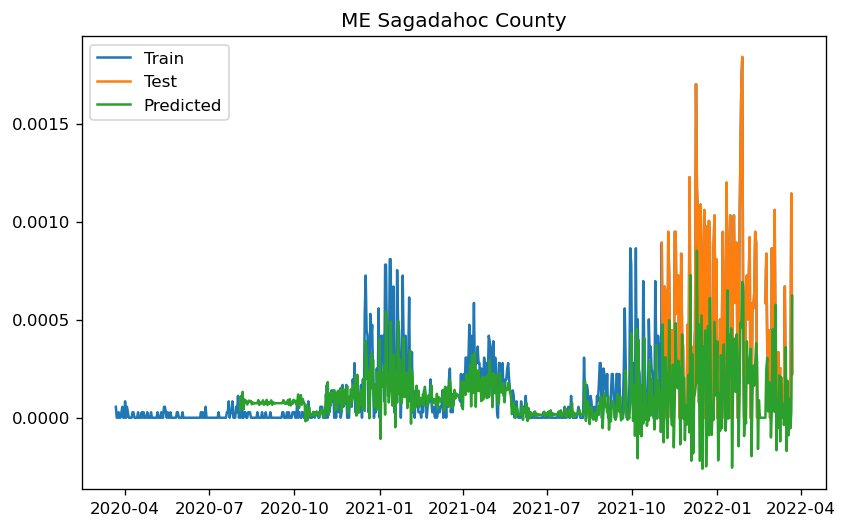

In [222]:
plt.figure(figsize= (8,5))
plt.plot(trainc[target], label= 'Train')
plt.plot(testc[target], label= 'Test')
plt.plot(predictions, label= 'Predicted')
plt.legend(loc= 'upper left')
plt.title(trainc.iloc[1]['state']+ ' ' + trainc.iloc[1]['county'])

Text(0.5, 1.0, 'ME Sagadahoc County')

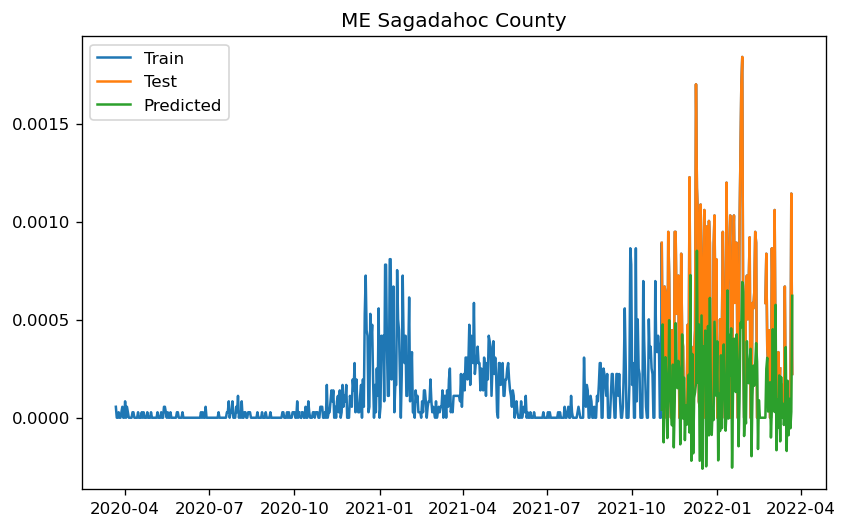

In [223]:
plt.figure(figsize= (8,5))
plt.plot(trainc[target], label= 'Train')
plt.plot(testc[target], label= 'Test')
plt.plot(testc['prediction'], label= 'Predicted')
plt.legend(loc= 'upper left')
plt.title(trainc.iloc[1]['state']+ ' ' + trainc.iloc[1]['county'])

In [235]:
from sklearn.metrics import r2_score
r2_score(testc[target].dropna(), testc[testc[target].isna() == False]['prediction'])

-0.059341617150082016

In [225]:
target = 'newCasesRatio'
mod = SARIMAX(trainc[target],
            order= (0,0,1),
             freq= 'D')

result = mod.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:          newCasesRatio   No. Observations:                  740
Model:               SARIMAX(0, 0, 1)   Log Likelihood                4938.697
Date:                Wed, 06 Apr 2022   AIC                          -9873.395
Time:                        22:46:27   BIC                          -9864.182
Sample:                    03-14-2020   HQIC                         -9869.843
                         - 03-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5680      0.021     26.762      0.000       0.526       0.610
sigma2      6.796e-08    1.8e-09     37.730      0.000    6.44e-08    7.15e-08
Ljung-Box (L1) (Q):                   0.00   Jarque-

C:\Users\aarme\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [226]:
predictions = pd.Series(result.predict(len(testc), exogenous = columns))

trainc.index = trainc.index.astype('datetime64[ns]')
testc.index = testc.index.astype('datetime64[ns]')
predictions.index = predictions.index.astype('datetime64[ns]')

testc['prediction'] = predictions

Text(0.5, 1.0, 'ME Sagadahoc County')

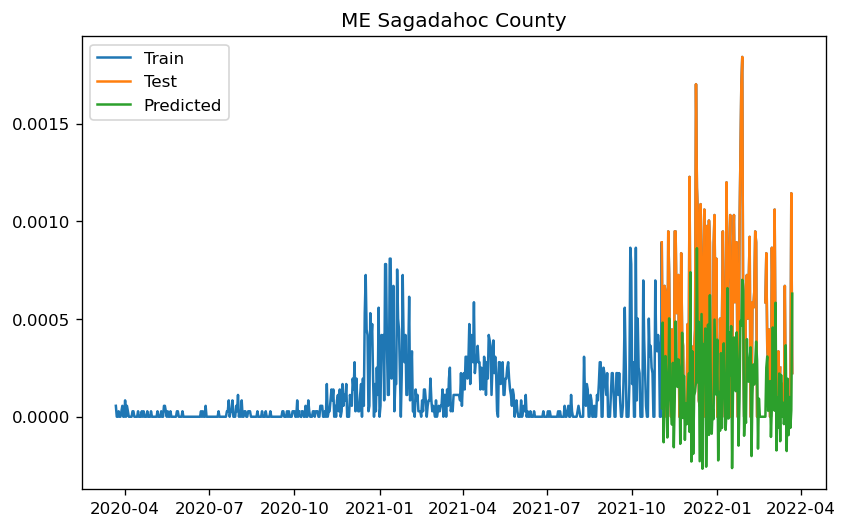

In [227]:
plt.figure(figsize= (8,5))
plt.plot(trainc[target], label= 'Train')
plt.plot(testc[target], label= 'Test')
plt.plot(testc['prediction'], label= 'Predicted')
plt.legend(loc= 'upper left')
plt.title(trainc.iloc[1]['state']+ ' ' + trainc.iloc[1]['county'])

In [228]:
r2_score(testc[target].dropna(), testc[testc[target].isna() == False]['prediction'])

-0.3742379207332238

In [255]:
merged1 = merged1[merged1['state'] != 'MP']
merged1.state.unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', nan], dtype=object)

In [256]:
scores = {}
target = 'newCasesRatio'
for state in merged1['state'].unique():
    state_df = merged1[merged1['state'] == state]
    for countyn in state_df['county'].unique():
        county = state_df[state_df['county'] == countyn]
        trainc = county[county['date'] <= '11/01/2021']
        trainc = county[county['date'].isna() == False]
        trainc = trainc.set_index('date')
        testc = county[county['date'] > '11/01/2021']
        testc = testc.set_index('date')
        trainc.index = pd.DatetimeIndex(trainc.index).to_period('D')
        mod = SARIMAX(trainc[target],
                    order= (0,0,1),
                     freq= 'D',
                     exog = trainc[columns])
        result = mod.fit()
        predictions = pd.Series(result.predict(len(testc), exogenous = columns))
        trainc.index = trainc.index.astype('datetime64[ns]')
        testc.index = testc.index.astype('datetime64[ns]')
        predictions.index = predictions.index.astype('datetime64[ns]')
        testc['prediction'] = predictions
        try:
            score_r2 = r2_score(testc[target], testc['prediction'])
        except:
            score_r2 = r2_score(testc[target].dropna(), testc[testc[target].isna() == False]['prediction'])
        scores[state + '_' + countyn] = score_r2

In [257]:
scores.keys()


dict_keys(['AK_Aleutians East Borough', 'AK_Aleutians West Census Area', 'AK_Anchorage Municipality', 'AK_Bethel Census Area', 'AK_Bristol Bay Borough', 'AK_Denali Borough', 'AK_Dillingham Census Area', 'AK_Fairbanks North Star Borough', 'AK_Haines Borough', 'AK_Hoonah-Angoon Census Area', 'AK_Juneau City and Borough', 'AK_Kenai Peninsula Borough', 'AK_Ketchikan Gateway Borough', 'AK_Kodiak Island Borough', 'AK_Kusilvak Census Area', 'AK_Lake and Peninsula Borough', 'AK_Matanuska-Susitna Borough', 'AK_Nome Census Area', 'AK_North Slope Borough', 'AK_Northwest Arctic Borough', 'AK_Petersburg Borough', 'AK_Prince of Wales-Hyder Census Area', 'AK_Sitka City and Borough', 'AK_Skagway Municipality', 'AK_Southeast Fairbanks Census Area', 'AK_Valdez-Cordova Census Area', 'AK_Wrangell City and Borough', 'AK_Yakutat City and Borough', 'AK_Yukon-Koyukuk Census Area', 'AL_Autauga County', 'AL_Baldwin County', 'AL_Barbour County', 'AL_Bibb County', 'AL_Blount County', 'AL_Bullock County', 'AL_Butl

In [258]:
scores

{'AK_Aleutians East Borough': -0.059341617150082016,
 'AK_Aleutians West Census Area': -0.06752574482742246,
 'AK_Anchorage Municipality': -0.18236854499808364,
 'AK_Bethel Census Area': -0.27994262348905896,
 'AK_Bristol Bay Borough': 1.0,
 'AK_Denali Borough': -0.23960730277865117,
 'AK_Dillingham Census Area': -0.21355035912810316,
 'AK_Fairbanks North Star Borough': -0.20439268978057923,
 'AK_Haines Borough': -0.16053173070424287,
 'AK_Hoonah-Angoon Census Area': 1.0,
 'AK_Juneau City and Borough': -0.19573496770736099,
 'AK_Kenai Peninsula Borough': -0.25025315405071624,
 'AK_Ketchikan Gateway Borough': -0.2824328587026672,
 'AK_Kodiak Island Borough': -0.15526055302455632,
 'AK_Kusilvak Census Area': -0.23581503874158072,
 'AK_Lake and Peninsula Borough': 1.0,
 'AK_Matanuska-Susitna Borough': -0.2598211382589002,
 'AK_Nome Census Area': -0.3607480178000122,
 'AK_North Slope Borough': -0.19026723108113908,
 'AK_Northwest Arctic Borough': -0.3008837253383949,
 'AK_Petersburg Boroug

In [261]:
np.mean(list(scores.values()))

-0.11465640427982882

In [253]:
merged1.state.unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', nan],
      dtype=object)

In [266]:
scores2 = {}
target = 'newCasesRatio'
for state in merged1['state'].unique():
    state_df = merged1[merged1['state'] == state]
    for countyn in state_df['county'].unique():
        county = state_df[state_df['county'] == countyn]
        trainc = county[county['date'] <= '11/01/2021']
        trainc = county[county['date'].isna() == False]
        trainc = trainc.set_index('date')
        testc = county[county['date'] > '11/01/2021']
        testc = testc.set_index('date')
        trainc.index = pd.DatetimeIndex(trainc.index).to_period('D')
        mod = SARIMAX(trainc[target],
                    order= (0,0,1),
                     freq= 'D')
#                      exog = trainc[columns])
        result = mod.fit()
        predictions = pd.Series(result.predict(len(testc), exogenous = columns))
        trainc.index = trainc.index.astype('datetime64[ns]')
        testc.index = testc.index.astype('datetime64[ns]')
        predictions.index = predictions.index.astype('datetime64[ns]')
        testc['prediction'] = predictions
        try:
            score_r2 = r2_score(testc[target], testc['prediction'])
        except:
            score_r2 = r2_score(testc[target].dropna(), testc[testc[target].isna() == False]['prediction'])
        scores2[state + '_' + countyn] = score_r2

In [267]:
np.mean(list(scores2.values()))

-0.1126312641866856

In [268]:
merged1.columns

Index(['date', 'state', 'county', 'population', 'newDeaths', 'newCases',
       'newCasesRatio', 'newDeathRatio', 'Order_code', 'General_GB_order_code',
       'mask_order',
       'Stay_at_Home_Order_Recommendation_Mandatory for all individuals',
       'Stay_at_Home_Order_Recommendation_Mandatory only for all individuals in certain areas of the jurisdiction',
       'Stay_at_Home_Order_Recommendation_Mandatory only for at-risk individuals in certain areas of the jurisdiction',
       'Stay_at_Home_Order_Recommendation_Mandatory only for at-risk individuals in the jurisdiction',
       'Stay_at_Home_Order_Recommendation_No order for individuals to stay home',
       'Action_Curbside/carryout/delivery only', 'Action_No order found',
       'Action_Open with social distancing/reduced seating/enhanced sanitation',
       'restaurant_order_0.0', 'restaurant_order_1.0', 'restaurant_order_2.0',
       'restaurant_order_3.0',
       'General_GB_order_group_Ban of gatherings over 101 or more 

In [297]:
merged['Order_code'] = merged['Order_code'] * -1 + 7

In [307]:
means = merged.groupby(['state', 'county']).mean()

In [299]:
totals = pd.read_csv('static.csv')

totals = totals.set_index(['state', 'county'])
totals = totals[['population','actuals.cases', 'actuals.deaths']]

In [309]:
totals = totals.merge(means)

In [320]:
totals.columns

Index(['population', 'actuals.cases', 'actuals.deaths', 'newDeaths',
       'newCases', 'newCasesRatio', 'newDeathRatio', 'Order_code',
       'restaurant_order', 'General_GB_order_code', 'mask_order', 'deathRatio',
       'caseRatio'],
      dtype='object')

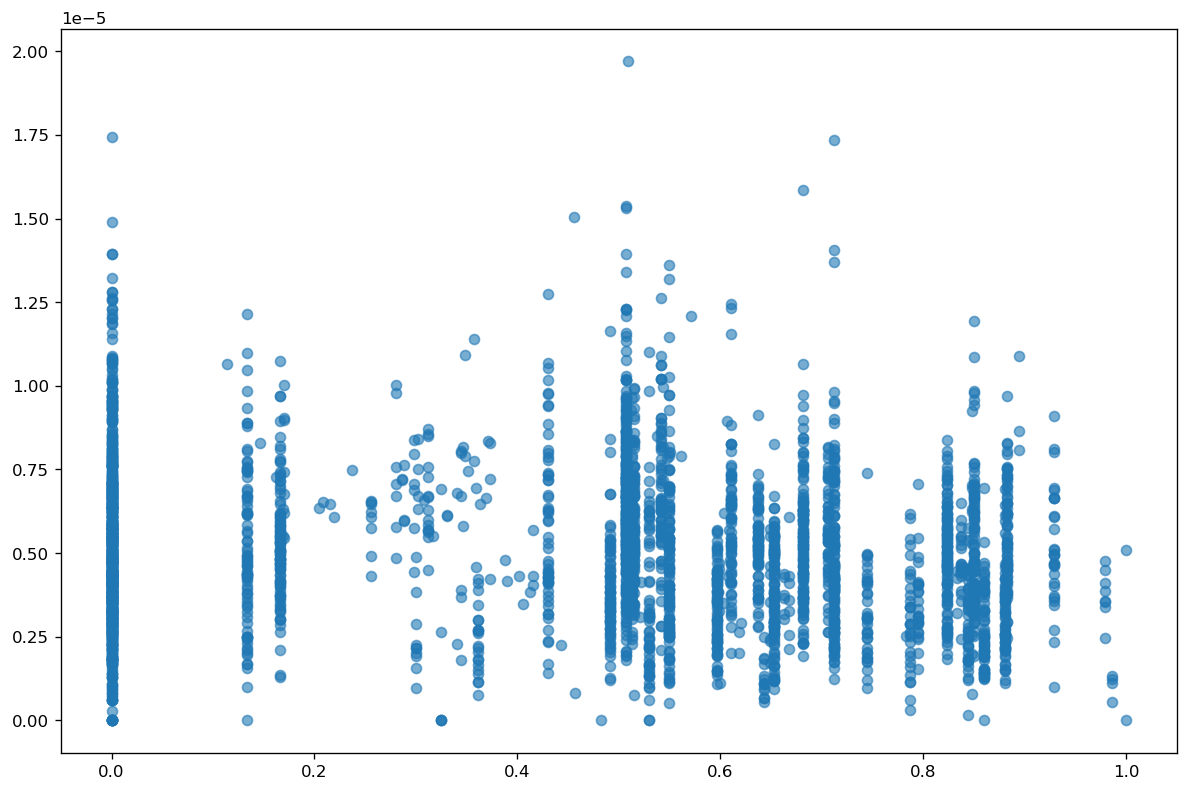

In [334]:
plt.scatter(totals['mask_order'], totals['newDeathRatio'], alpha= 0.6)

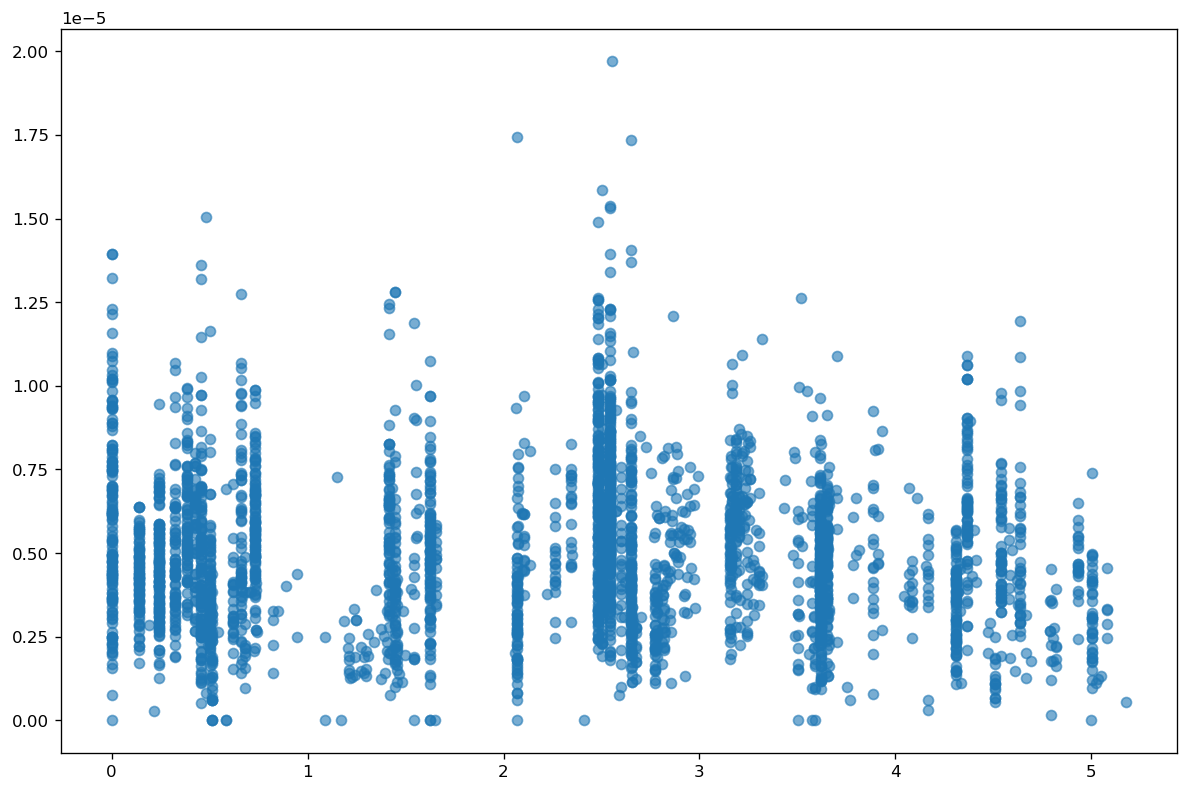

In [326]:
plt.scatter(totals['General_GB_order_code'], totals['newDeathRatio'], alpha= 0.6)

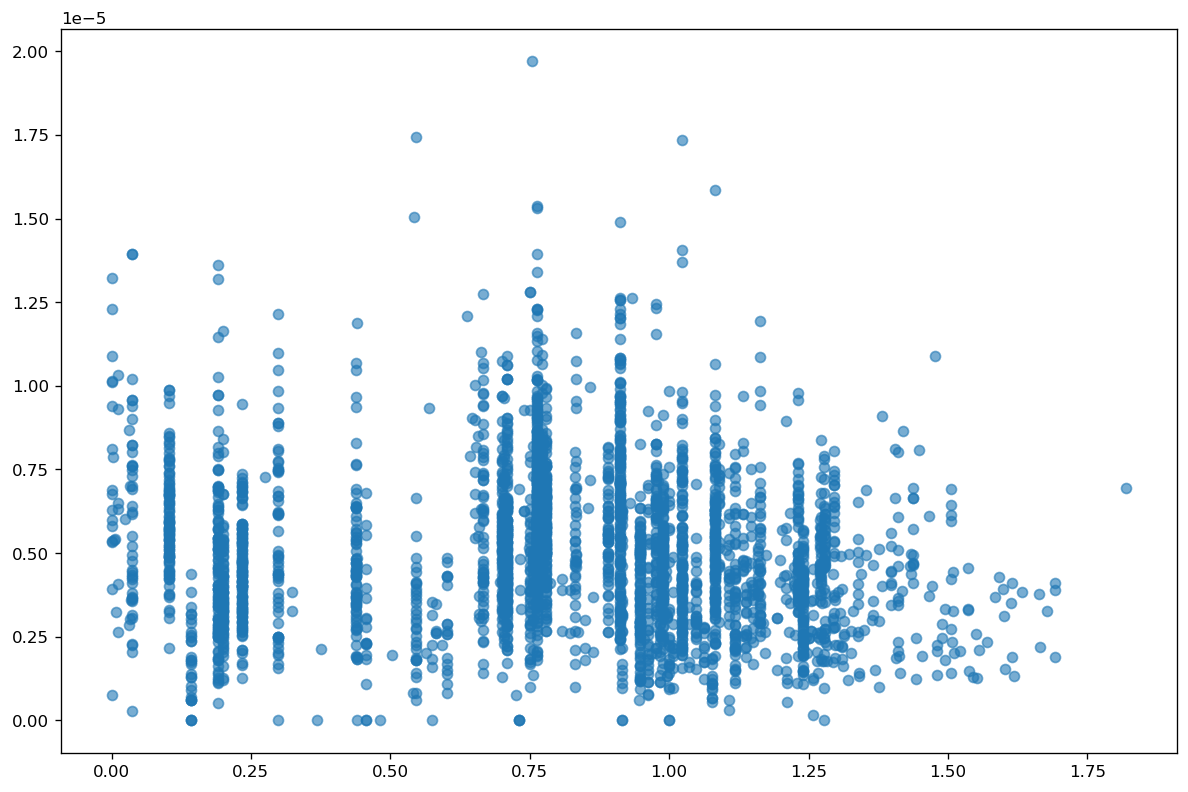

In [325]:
plt.scatter(totals['restaurant_order'], totals['newDeathRatio'], alpha= 0.6)

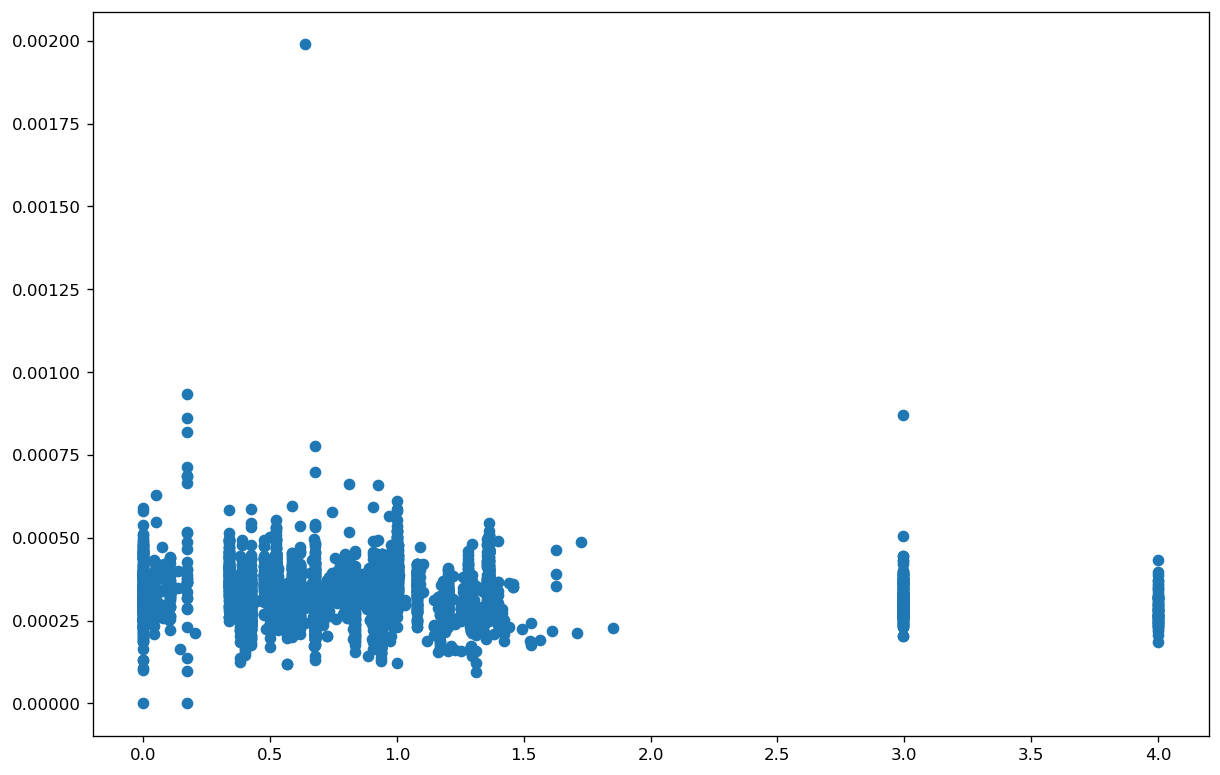

In [342]:
plt.scatter(totals['Order_code'], totals['newCasesRatio'])

In [314]:
totals['deathRatio'] = totals['actuals.deaths']/ totals['population']
totals['caseRatio'] = totals['actuals.cases']/ totals['population']

In [315]:
totals.corr()

,population,actuals.cases,actuals.deaths,newDeaths,newCases,newCasesRatio,newDeathRatio,Order_code,restaurant_order,General_GB_order_code,mask_order,deathRatio,caseRatio
population,1.000000,0.981598,0.952904,0.955601,0.979374,-0.051460,-0.150861,0.087712,0.159840,0.042151,0.107460,-0.137167,-0.014605
actuals.cases,0.981598,1.000000,0.968417,0.966681,0.999227,-0.005620,-0.126875,0.082013,0.136211,0.028478,0.083614,-0.111275,0.032431
actuals.deaths,0.952904,0.968417,1.000000,0.997885,0.967127,-0.016791,-0.068730,0.088432,0.139124,0.031420,0.094359,-0.045898,0.020317
newDeaths,0.955601,0.966681,0.997885,1.000000,0.965543,-0.020048,-0.067079,0.091054,0.150429,0.041780,0.106229,-0.050520,0.018154
newCases,0.979374,0.999227,0.967127,0.965543,1.000000,-0.002452,-0.129136,0.082127,0.137019,0.029751,0.083528,-0.113297,0.033953
newCasesRatio,-0.051460,-0.005620,-0.016791,-0.020048,-0.002452,1.000000,0.277051,-0.072189,-0.176304,-0.097739,-0.137746,0.273271,0.899595
newDeathRatio,-0.150861,-0.126875,-0.068730,-0.067079,-0.129136,0.277051,1.000000,0.013600,-0.092909,-0.042099,-0.116035,0.899174,0.266905
Order_code,0.087712,0.082013,0.088432,0.091054,0.082127,-0.072189,0.013600,1.000000,0.414499,0.318549,0.138415,-0.010196,-0.044000
restaurant_order,0.159840,0.136211,0.139124,0.150429,0.137019,-0.176304,-0.092909,0.414499,1.000000,0.668079,0.683842,-0.145631,-0.152005
General_GB_order_code,0.042151,0.028478,0.031420,0.041780,0.029751,-0.097739,-0.042099,0.318549,0.668079,1.000000,0.536911,-0.103726,-0.071624


Text(0.5, 1.0, 'Relationship between gathering bans and new cases')

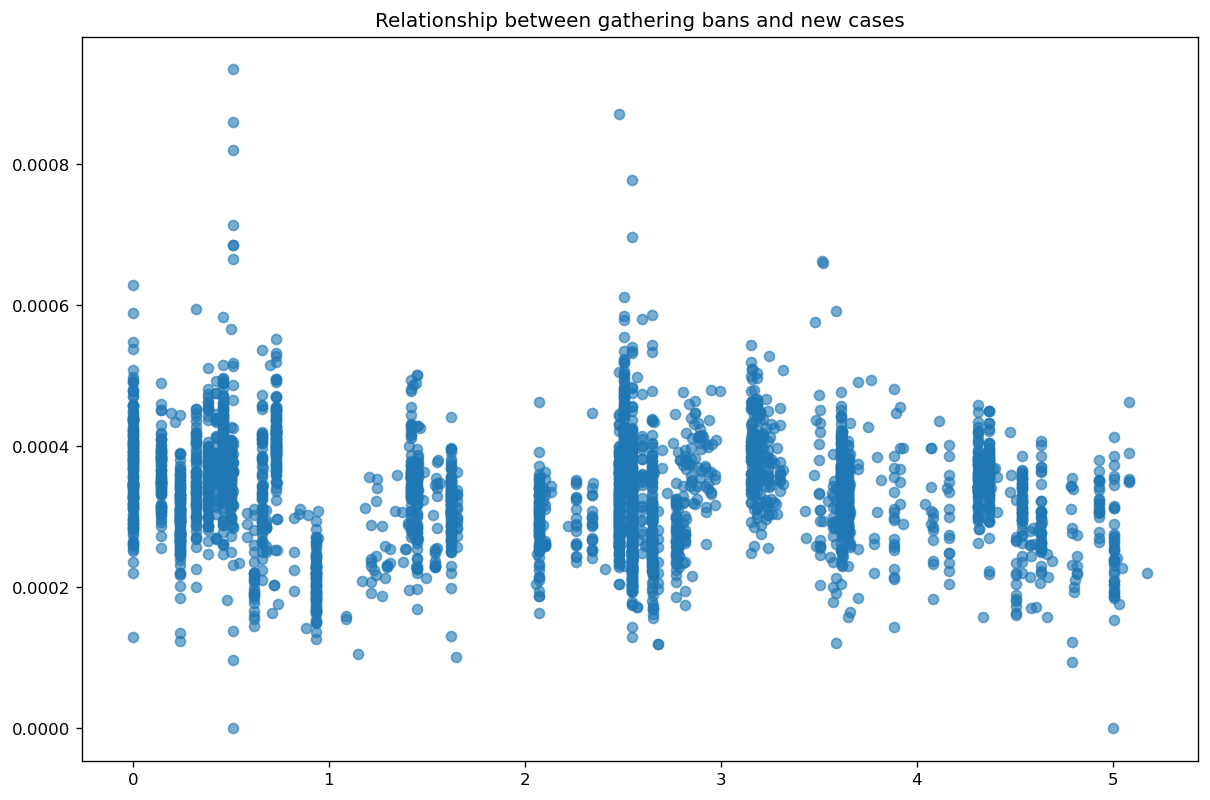

In [341]:
plt.scatter(totals[totals['newCasesRatio']< 0.0012]['General_GB_order_code'], totals[totals['newCasesRatio']< 0.0012]['newCasesRatio'], alpha= 0.6)
plt.title('Relationship between gathering bans and new cases')

In [338]:
totals[totals['newCasesRatio']>.001]

,population,actuals.cases,actuals.deaths,newDeaths,newCases,newCasesRatio,newDeathRatio,Order_code,restaurant_order,General_GB_order_code,mask_order,deathRatio,caseRatio
1641,2500,183,0.0,0.000000,2.822581,0.001129,0.000000,NaN,NaN,NaN,NaN,0.000000,0.073200
2879,169,170,1.0,0.002041,0.336066,0.001989,0.000012,0.636986,0.636986,2.865297,0.570776,0.005917,1.005917


,Unnamed: 0,testPositivityRatio,caseDensity_x,infectionRate,infectionRateCI90,date,fips,country,state,county,level,locationId,population,cases,deaths,newCases,newDeaths,overall,caseDensity_y,cdcTransmissionLevel,newDeathRatio,newCasesRatio,deathsRatio,casesRatio
2034069,2034069,0.000,0.0,NaN,NaN,2020-06-04,48301,US,TX,Loving County,county,iso1:us#iso2:us-tx#fips:48301,169,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
2034070,2034070,0.000,0.0,NaN,NaN,2020-06-05,48301,US,TX,Loving County,county,iso1:us#iso2:us-tx#fips:48301,169,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
2034071,2034071,0.000,0.0,NaN,NaN,2020-06-06,48301,US,TX,Loving County,county,iso1:us#iso2:us-tx#fips:48301,169,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
2034072,2034072,0.000,0.0,NaN,NaN,2020-06-07,48301,US,TX,Loving County,county,iso1:us#iso2:us-tx#fips:48301,169,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
2034073,2034073,0.000,0.0,NaN,NaN,2020-06-08,48301,US,TX,Loving County,county,iso1:us#iso2:us-tx#fips:48301,169,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
2034074,2034074,0.000,0.0,NaN,NaN,2020-06-09,48301,US,TX,Loving County,county,iso1:us#iso2:us-tx#fips:48301,169,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
2034075,2034075,0.000,0.0,NaN,NaN,2020-06-10,48301,US,TX,Loving County,county,iso1:us#iso2:us-tx#fips:48301,169,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
2034076,2034076,NaN,NaN,NaN,NaN,2020-06-11,48301,US,TX,Loving County,county,iso1:us#iso2:us-tx#fips:48301,169,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
2034077,2034077,NaN,NaN,NaN,NaN,2020-06-12,48301,US,TX,Loving County,county,iso1:us#iso2:us-tx#fips:48301,169,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
2034078,2034078,NaN,NaN,NaN,NaN,2020-06-13,48301,US,TX,Loving County,county,iso1:us#iso2:us-tx#fips:48301,169,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN


In [316]:
totals.columns

Index(['population', 'actuals.cases', 'actuals.deaths', 'newDeaths',
       'newCases', 'newCasesRatio', 'newDeathRatio', 'Order_code',
       'restaurant_order', 'General_GB_order_code', 'mask_order', 'deathRatio',
       'caseRatio'],
      dtype='object')

Text(0.5, 1.0, 'Relationship between stay home orders and new cases')

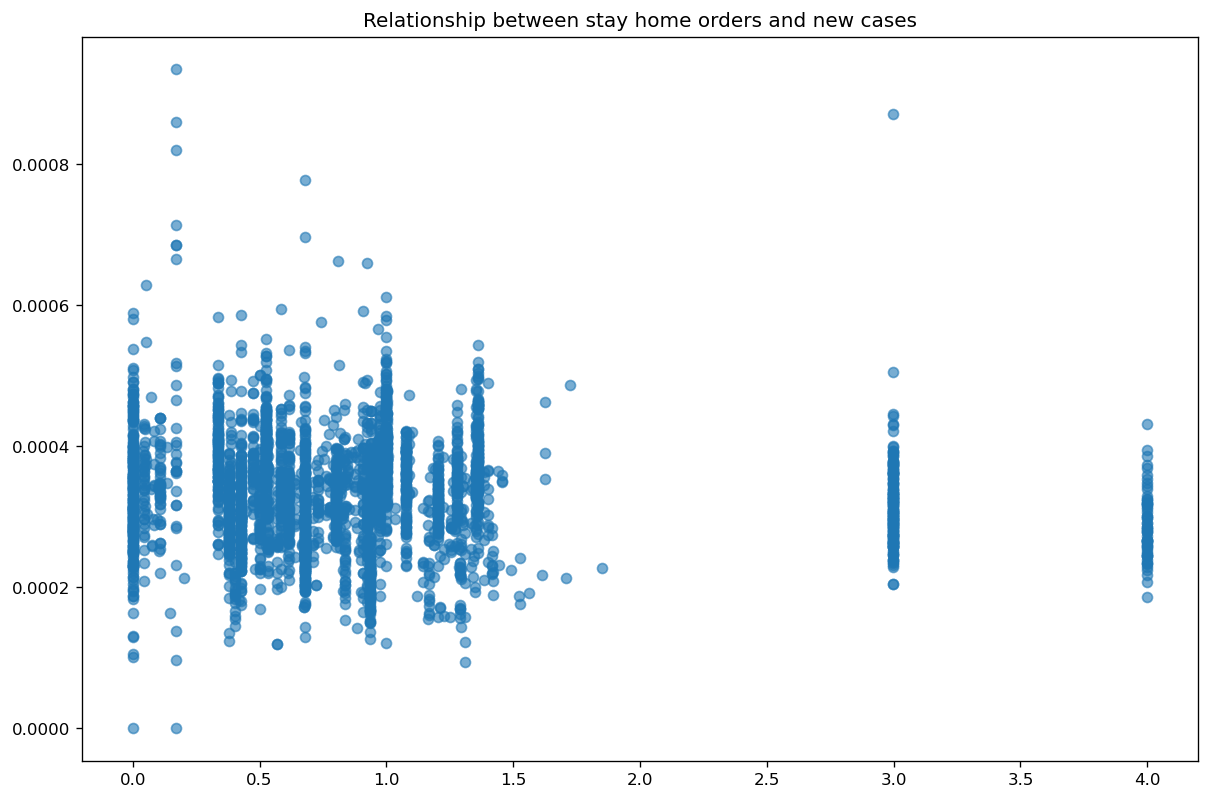

In [344]:
plt.scatter(totals[totals['newCasesRatio']< 0.0012]['Order_code'], totals[totals['newCasesRatio']< 0.0012]['newCasesRatio'], alpha= 0.6)
plt.title('Relationship between stay home orders and new cases')

Text(0.5, 1.0, 'Relationship between resturant restrictions and new cases')

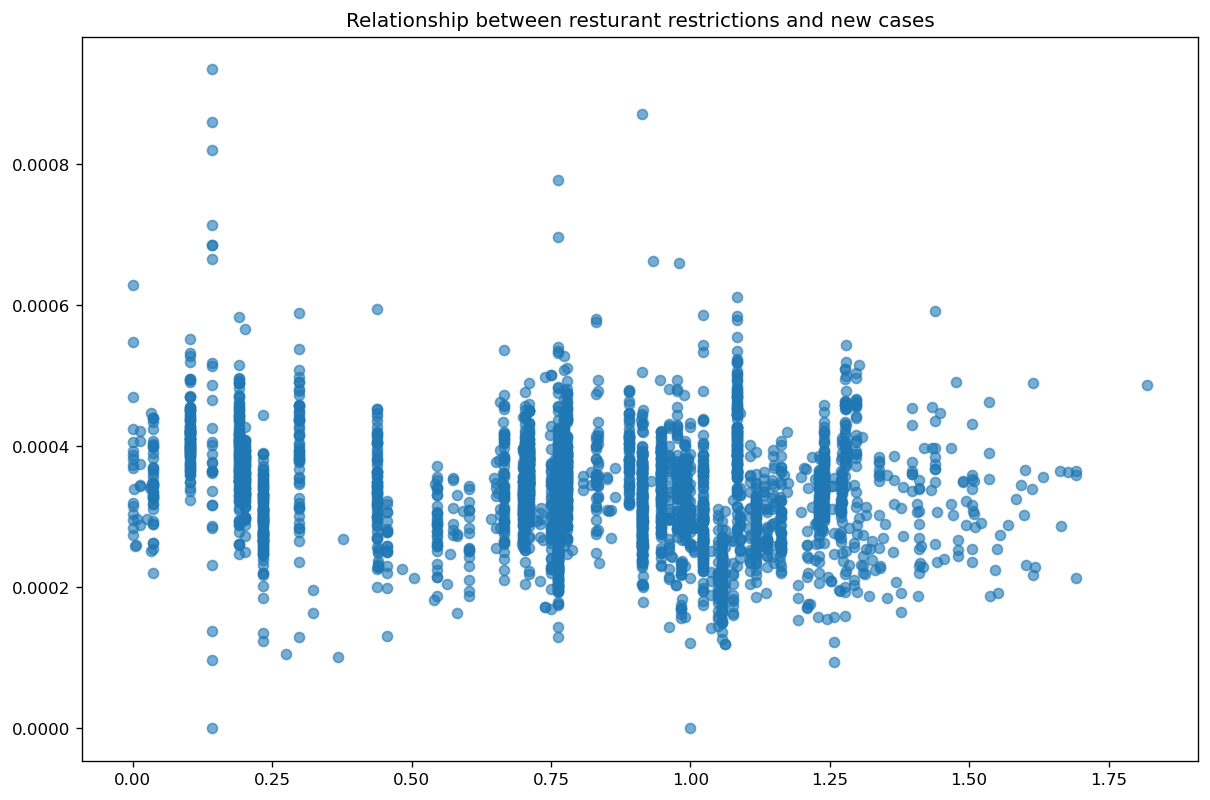

In [347]:
plt.scatter(totals[totals['newCasesRatio']< 0.0012]['restaurant_order'], totals[totals['newCasesRatio']< 0.0012]['newCasesRatio'], alpha= 0.6)
plt.title('Relationship between resturant restrictions and new cases')

Text(0.5, 1.0, 'Relationship between mask mandates and new cases')

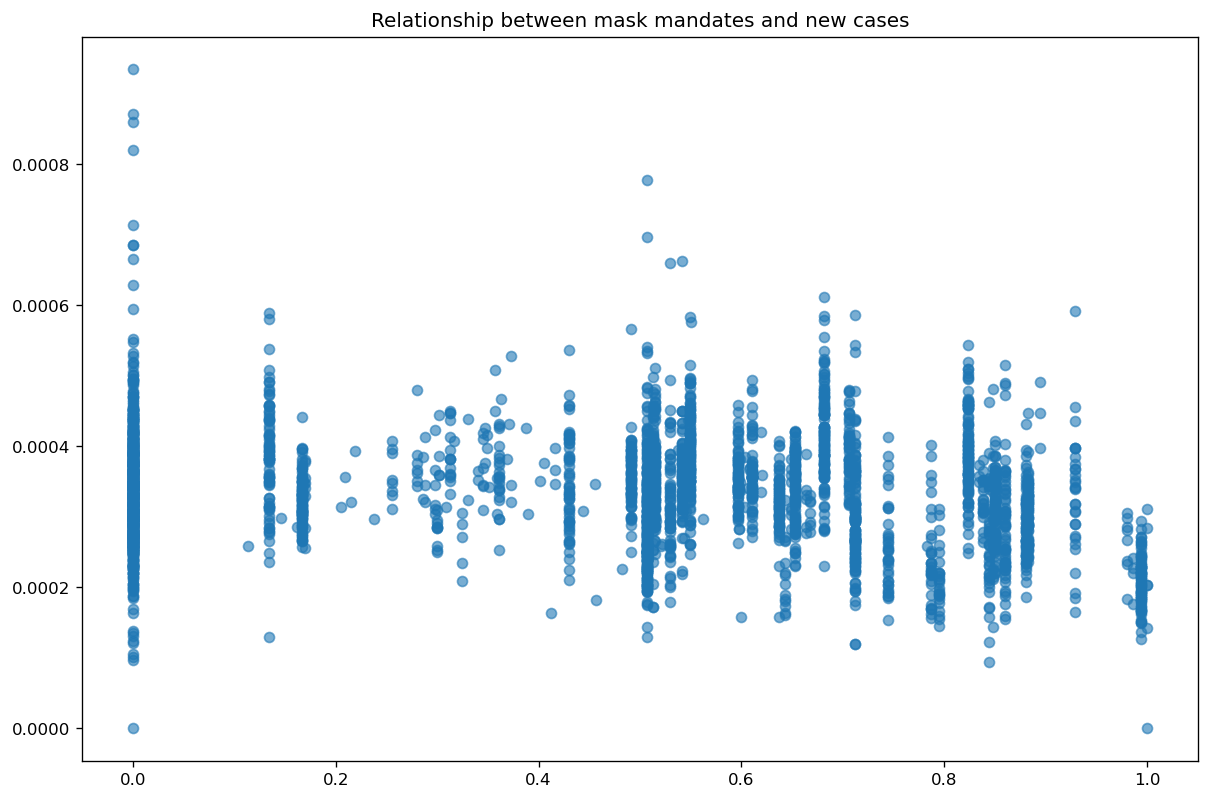

In [349]:
plt.scatter(totals[totals['newCasesRatio']< 0.0012]['mask_order'], totals[totals['newCasesRatio']< 0.0012]['newCasesRatio'], alpha= 0.6)
plt.title('Relationship between mask mandates and new cases')

In [ ]:
import statsmodels.api as sm
results = sm.OLS(y, x).fit()
print(results.summary())